# Checkpoint 1

Reminder: 

- You are being evaluated for compeletion and effort in this checkpoint. 
- Avoid manual labor / hard coding as much as possible, everything we've taught you so far are meant to simplify and automate your process.

We will be working with the same `states_edu.csv` that you should already be familiar with from the tutorial.

We investigated Grade 8 reading score in the tutorial. For this checkpoint, you are asked to investigate another test. Here's an overview:

* Choose a specific response variable to focus on
>Grade 4 Math, Grade 4 Reading, Grade 8 Math
* Pick or create features to use
>Will all the features be useful in predicting test score? Are some more important than others? Should you standardize, bin, or scale the data?
* Explore the data as it relates to that test
>Create at least 2 visualizations (graphs), each with a caption describing the graph and what it tells us about the data
* Create training and testing data
>Do you want to train on all the data? Only data from the last 10 years? Only Michigan data?
* Train a ML model to predict outcome 
>Define what you want to predict, and pick a model in sklearn to use (see sklearn <a href="https://scikit-learn.org/stable/modules/linear_model.html">regressors</a>.
* Summarize your findings
>Write a 1 paragraph summary of what you did and make a recommendation about if and how student performance can be predicted

Include comments throughout your code! Every cleanup and preprocessing task should be documented.

Of course, if you're finding this assignment interesting (and we really hope you do!), you are welcome to do more than the requirements! For example, you may want to see if expenditure affects 4th graders more than 8th graders. Maybe you want to look into the extended version of this dataset and see how factors like sex and race are involved. You can include all your work in this notebook when you turn it in -- just always make sure you explain what you did and interpret your results. Good luck!

<h2> Data Cleanup </h2>

Import `numpy`, `pandas`, and `matplotlib`.

(Feel free to import other libraries!)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Load in the "states_edu.csv" dataset and take a look at the head of the data

In [2]:
df = pd.read_csv('../data/states_edu.csv')
df.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,57948.0,58025.0,41167.0,NaN,NaN,731634.0,208.0,252.0,207.0,NaN
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,9748.0,8789.0,6714.0,NaN,NaN,122487.0,NaN,NaN,NaN,NaN
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,55433.0,49081.0,37410.0,NaN,NaN,673477.0,215.0,265.0,209.0,NaN
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,34632.0,36011.0,27651.0,NaN,NaN,441490.0,210.0,256.0,211.0,NaN
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,418418.0,363296.0,270675.0,NaN,NaN,5254844.0,208.0,261.0,202.0,NaN


You should always familiarize yourself with what each column in the dataframe represents. Read about the states_edu dataset here: https://www.kaggle.com/noriuk/us-education-datasets-unification-project

Use this space to rename columns, deal with missing data, etc. _(optional)_

In [3]:
# Rename the columns as in Tutorial 1
df.rename({
    'GRADES_PK_G':'ENROLL_PREK',
    'GRADES_KG_G':'ENROLL_KINDER',
    'GRADES_4_G':'ENROLL_4',
    'GRADES_8_G':'ENROLL_8',
    'GRADES_12_G':'ENROLL_12',
    'GRADES_1_8_G':'ENROLL_PRIMARY',
    'GRADES_9_12_G':'ENROLL_HS',
    'GRADES_ALL_G':'ENROLL_ALL',
    'ENROLL':'ENROLL_ALL_EST'
    },
    axis=1,inplace=True)

# Fill in the missing values with estimated enrollment number
df["ENROLL_ALL_EST"] = df["ENROLL_ALL_EST"].fillna(df["ENROLL_ALL"])

#

# check the first few rows
df.head()
df.isna().sum()

PRIMARY_KEY                        0
STATE                              0
YEAR                               0
ENROLL_ALL_EST                    83
TOTAL_REVENUE                    440
FEDERAL_REVENUE                  440
STATE_REVENUE                    440
LOCAL_REVENUE                    440
TOTAL_EXPENDITURE                440
INSTRUCTION_EXPENDITURE          440
SUPPORT_SERVICES_EXPENDITURE     440
OTHER_EXPENDITURE                491
CAPITAL_OUTLAY_EXPENDITURE       440
ENROLL_PREK                      173
ENROLL_KINDER                     83
ENROLL_4                          83
ENROLL_8                          83
ENROLL_12                         83
ENROLL_PRIMARY                   695
ENROLL_HS                        644
ENROLL_ALL                        83
AVG_MATH_4_SCORE                1150
AVG_MATH_8_SCORE                1113
AVG_READING_4_SCORE             1065
AVG_READING_8_SCORE             1153
dtype: int64

<h2>Exploratory Data Analysis (EDA) </h2>

Chosen Outcome Variable for Test: *AVG_MATH_8_SCORE*

How many years of data are logged in our dataset? 

In [4]:
print(df["YEAR"].unique())
print(df["YEAR"].nunique())

[1992 1993 1994 1995 1996 1997 1998 1999 2000 2001 2002 2003 2004 2005
 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015 2016 1986 1987 1988
 1989 1990 1991 2017 2019]
33


Let's compare Michigan to Ohio. Which state has the higher average outcome score across all years?

In [5]:
# Filter the dataset so we only look at michigan and ohio
df_1 = df[df['STATE'].isin(['MICHIGAN', 'OHIO'])]

# Calculate the mean
average_scores = df_1.groupby('STATE')['AVG_MATH_8_SCORE'].mean()

if average_scores['MICHIGAN'] > average_scores['OHIO']:
    print("Michigan has a higher average outcome score.")
elif average_scores['MICHIGAN'] < average_scores['OHIO']:
    print("Ohio has a higher average outcome score.")
else:
    print("Michigan and Ohio have the same average outcome score.")

Ohio has a higher average outcome score.


Find the average for your outcome score across all states in 2019

In [6]:
# Filter the dataset for the year 2019
df_2019 = df[df['YEAR'] == 2019]
df_2019.head()

# calculate the average math score for 8 th grade
average_outcome_2019 = df_2019['AVG_MATH_8_SCORE'].mean()

print(f"The average outcome score across all states in 2019 was: {average_outcome_2019}")


The average outcome score across all states in 2019 was: 281.2641509433962


Find the maximum outcome score for every state. 

Refer to the `Grouping and Aggregating` section in Tutorial 0 if you are stuck.

In [7]:
# Group by state and calculate the maximum outcome score
max_by_state = df.groupby('STATE')['AVG_MATH_8_SCORE'].max()

print(max_by_state)

STATE
ALABAMA                 269.0
ALASKA                  283.0
ARIZONA                 283.0
ARKANSAS                279.0
CALIFORNIA              277.0
COLORADO                292.0
CONNECTICUT             289.0
DELAWARE                284.0
DISTRICT_OF_COLUMBIA    269.0
DODEA                   293.0
FLORIDA                 281.0
GEORGIA                 281.0
HAWAII                  281.0
IDAHO                   287.0
ILLINOIS                285.0
INDIANA                 288.0
IOWA                    286.0
KANSAS                  290.0
KENTUCKY                282.0
LOUISIANA               273.0
MAINE                   289.0
MARYLAND                288.0
MASSACHUSETTS           301.0
MICHIGAN                280.0
MINNESOTA               295.0
MISSISSIPPI             274.0
MISSOURI                286.0
MONTANA                 293.0
NATIONAL                285.0
NEBRASKA                288.0
NEVADA                  278.0
NEW_HAMPSHIRE           296.0
NEW_JERSEY              296.0
NEW_

<h2> Feature Engineering </h2>

After exploring the data, you can choose to modify features that you would use to predict the performance of the students on your chosen response variable. 

You can also create your own features. For example, perhaps you figured that maybe a state's expenditure per student may affect their overall academic performance so you create a expenditure_per_student feature.

Use this space to modify or create features.

In [8]:
# Create a new column which represents expenditure per student
df['EXPEN_PER_STUDENT'] = df['SUPPORT_SERVICES_EXPENDITURE'] / df['ENROLL_ALL']

Feature engineering justification: **<BRIEFLY DESCRIBE WHY YOU MADE THE CHANGES THAT YOU DID\>**

I want to check if there is really a relationship of education expenditure and student performance. Since each state has different revenue, expenditure and population scale, it would be reasonable to create this new variable, expenditure per student, so that the trend we observed is less biased.

<h2>Visualization</h2>

Investigate the relationship between your chosen response variable and at least two predictors using visualizations. Write down your observations.

**Visualization 1**

<Axes: title={'center': 'Distribution of Expenditure per student'}, ylabel='Frequency'>

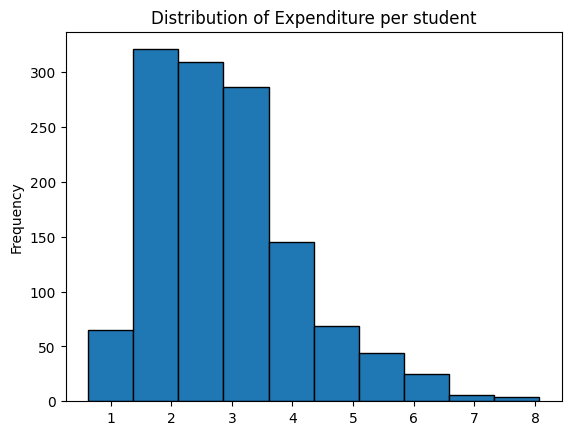

In [9]:
df.EXPEN_PER_STUDENT.plot.hist(title="Distribution of Expenditure per student", edgecolor="black")

**<CAPTION FOR VIZ 1>**

As the title suggested, this is the frequency bar chart about expen_per_student

**Visualization 2**

Text(0.5, 1.0, 'Expenditure per student Over Time')

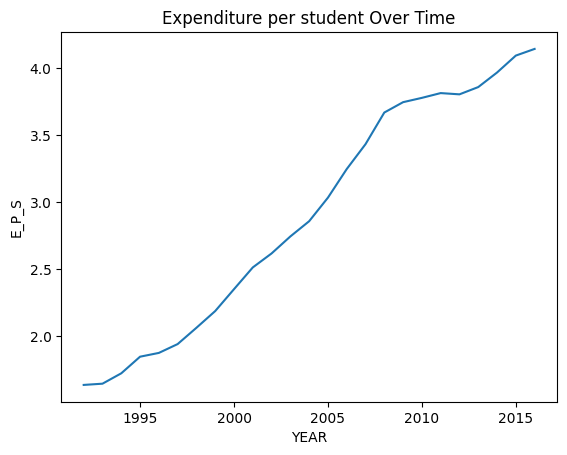

In [10]:
df.groupby('YEAR')["EXPEN_PER_STUDENT"].mean().plot()
plt.ylabel('E_P_S')
plt.title('Expenditure per student Over Time')

**<CAPTION FOR VIZ 2>**
As the title suggested, also we can see a obvious increasing trend here.

**Visualization 3**

Text(0, 0.5, '8th Grade Math Score')

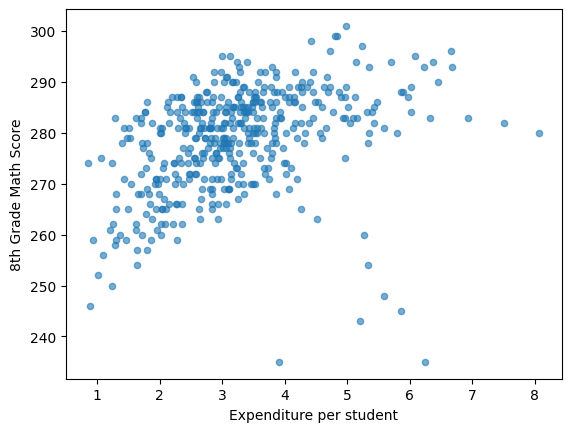

In [15]:
df.plot.scatter(x='EXPEN_PER_STUDENT', y='AVG_MATH_8_SCORE', alpha=0.6)
plt.xlabel('Expenditure per student')
plt.ylabel('8th Grade Math Score')

**Caption for Vis3**  We can see some relation \ trend between the EPS and 8 th grade student math score, but this is not a very strong relation showed in the graph, we can definitely see some outliers especially when we have low score associated with pretty high EPS.

**Visualizaton 4**

Text(0, 0.5, '8th Grade Reading Score')

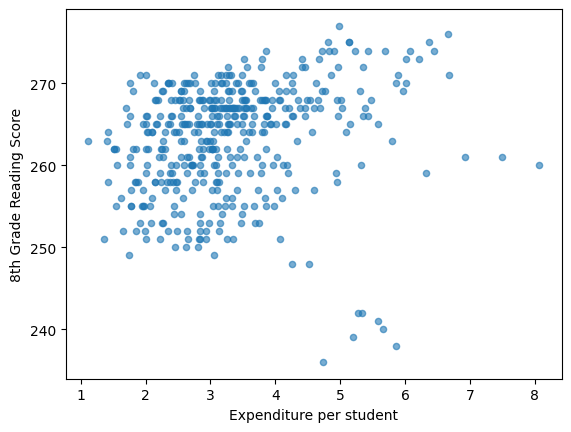

In [16]:
df.plot.scatter(x='EXPEN_PER_STUDENT', y='AVG_READING_8_SCORE', alpha=0.6)
plt.xlabel('Expenditure per student')
plt.ylabel('8th Grade Reading Score')

**Caption for Vis 4** We could also see a vague relation between the EPS and 8 th grade student reading score. Also, there are some outliers with low score associated with high EPS.

<h2> Data Creation </h2>

_Use this space to create train/test data_

In [11]:
from sklearn.model_selection import train_test_split

In [18]:
# I would try to perdict on 8 th grade math score based on expenditue, 8th grade reading score and 4th grade math score
X = df[['EXPEN_PER_STUDENT','AVG_READING_8_SCORE','AVG_MATH_4_SCORE']].dropna()
y = df.loc[X.index]['AVG_MATH_8_SCORE']
y.fillna(y.median(), inplace=True)

In [20]:
# SIMILARLY, Split the training and test dataset.
X_train, X_test, y_train, y_test = train_test_split(
     X, y, test_size=0.3, random_state=42)

<h2> Prediction </h2>

ML Models [Resource](https://medium.com/@vijaya.beeravalli/comparison-of-machine-learning-classification-models-for-credit-card-default-data-c3cf805c9a5a)

In [23]:
# we again use linearRegrassion here as in the visualizatoin above, a linear regression method seems to satisfy 
# what we are trying to see in the prediction
from sklearn.linear_model import LinearRegression

In [24]:
# create your model here
model = LinearRegression()

In [25]:
model.fit(X_train, y_train)

LinearRegression()

In [26]:
y_pred = model.predict(X_test)

## Evaluation

Choose some metrics to evaluate the performance of your model, some of them are mentioned in the tutorial.

In [27]:
# look at the R2 score
model.score(X_test, y_test)

0.9221173693006256

So we are seeing a high R2 score which could potentially suggests a high correlation.

In [29]:
# mean error
np.mean(model.predict(X_test)-y_test)

0.5841555693464268

In [30]:
# root mean squared error
np.mean((model.predict(X_test)-y_test)**2)**0.5

2.243913574870482

We have copied over the graphs that visualize the model's performance on the training and testing set. 

Change `col_name` and modify the call to `plt.ylabel()` to isolate how a single predictor affects the model.

Text(0.5, 1.0, 'Model Behavior On Training Set')

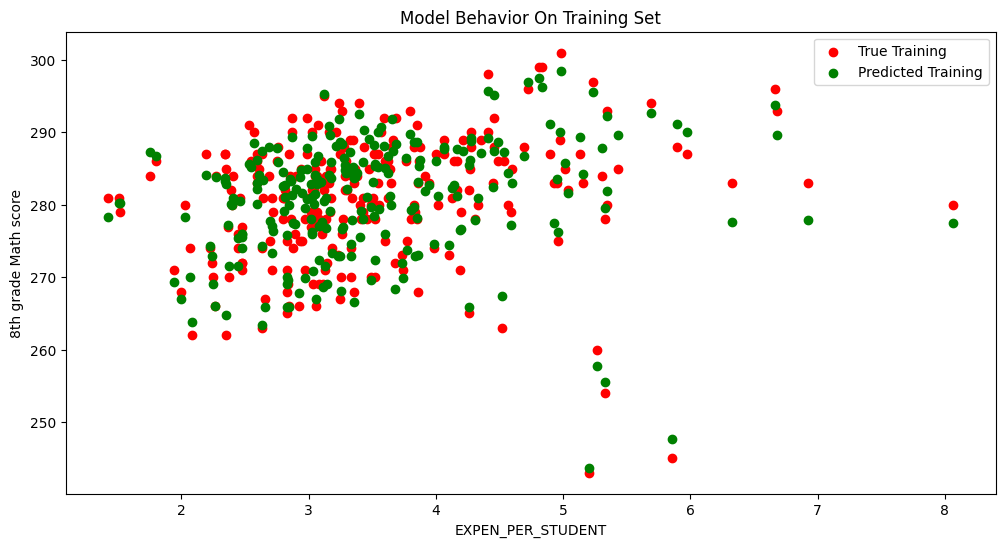

In [33]:
col_name = 'EXPEN_PER_STUDENT'

f = plt.figure(figsize=(12,6))
plt.scatter(X_train['EXPEN_PER_STUDENT'], y_train, color = "red")
plt.scatter(X_train['EXPEN_PER_STUDENT'], model.predict(X_train), color = "green")

plt.legend(['True Training','Predicted Training'])
plt.xlabel('EXPEN_PER_STUDENT')
plt.ylabel('8th grade Math score')
plt.title("Model Behavior On Training Set")

Well seems like the model is making very good, or perhaps too good prediction on the training set. This could probably leads to overfitting the model. Lets see how it performs on the testing set.

Text(0.5, 1.0, 'Model Behavior on Testing Set')

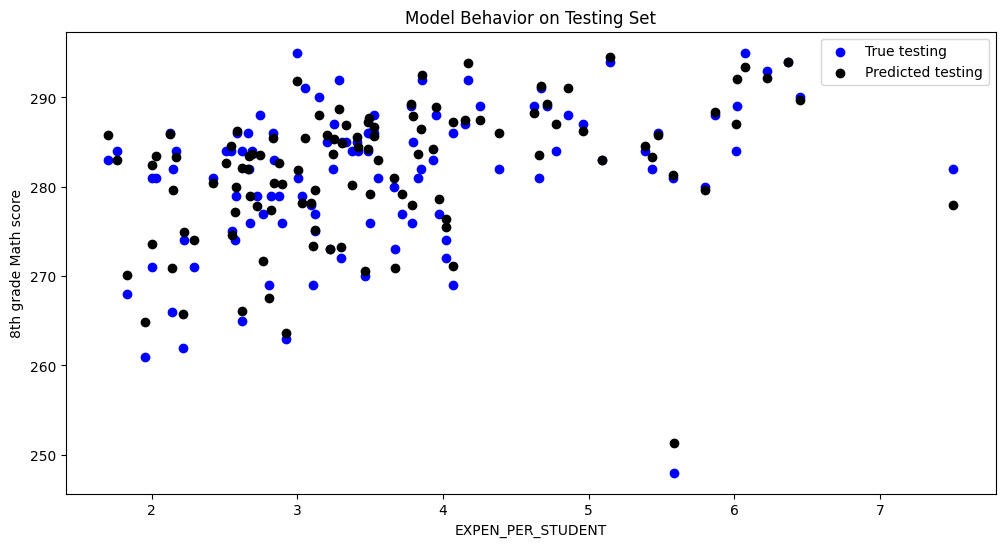

In [34]:
col_name = 'EXPEN_PER_STUDENT'

f = plt.figure(figsize=(12,6))
plt.scatter(X_test['EXPEN_PER_STUDENT'], y_test, color = "blue")
plt.scatter(X_test['EXPEN_PER_STUDENT'], model.predict(X_test), color = "black")

plt.legend(['True testing','Predicted testing'])
plt.xlabel('EXPEN_PER_STUDENT')
plt.ylabel('8th grade Math score')
plt.title("Model Behavior on Testing Set")

<h2> Summary </h2>

**<WRITE A PARAGRAPH SUMMARIZING YOUR WORK, FINDINGS, AND THE PERFORMANCE OF YOUR MODEL\>**

1. First, I created the new variable expenditure per student to make the comparison or prediction in the same scale since different state has disparate financial situation and different population.
2. Then, by simply looking at the plot of EPS and some factors (8th grade average math and reading score) that could reflect the students' learning quality hence reflect the education quality to some extent, we do can note some positive correlation.
3. However, I also noted some outliers that have high EPS associated with low scores. But we have to admit that each person has different ability \ repertoire, so when making the training and testing dataset, I added the average 8 th grade reading score and average 4 th grade math score along with the expenditure per student. In this case, if a student does show a strong academic record, with higher EPS, what would our prediction be on the average 8 th grade math score.
4. Then by training the model on the training dataset, by the scatterplot, we could observe that it is performing pretty well on the training set, but I was a bit worried that the model was overfitted.
5. Then, by checking the predictions made on the testing dataset, we could see the model is actually performing well too.
6. So now, it might be a reasonable idea that, if not downright positively, expenditure per student does have correlations with the students' study quality and education quality.